In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

from utils import create_players
from utils import ListGraph
from utils import make_groups
from utils import internal_communications
from utils import external_communications
from utils import play_one_round
from utils import update_strategies
from utils import num_coopers

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
%load_ext autoreload
%autoreload 2

## Define graph and players

In [3]:
# number of players
n_players = 50

In [4]:
# create players dict
players = create_players(n_players)
players[:5]

[{'id': 0, 'strategy': 'c', 'fitness': 0},
 {'id': 1, 'strategy': 'c', 'fitness': 0},
 {'id': 2, 'strategy': 'c', 'fitness': 0},
 {'id': 3, 'strategy': 'd', 'fitness': 0},
 {'id': 4, 'strategy': 'c', 'fitness': 0}]

In [7]:
# create players graph
players_graph = ListGraph(n_players)
# devide players to groups
player_groups = make_groups(n_players)

## Make links

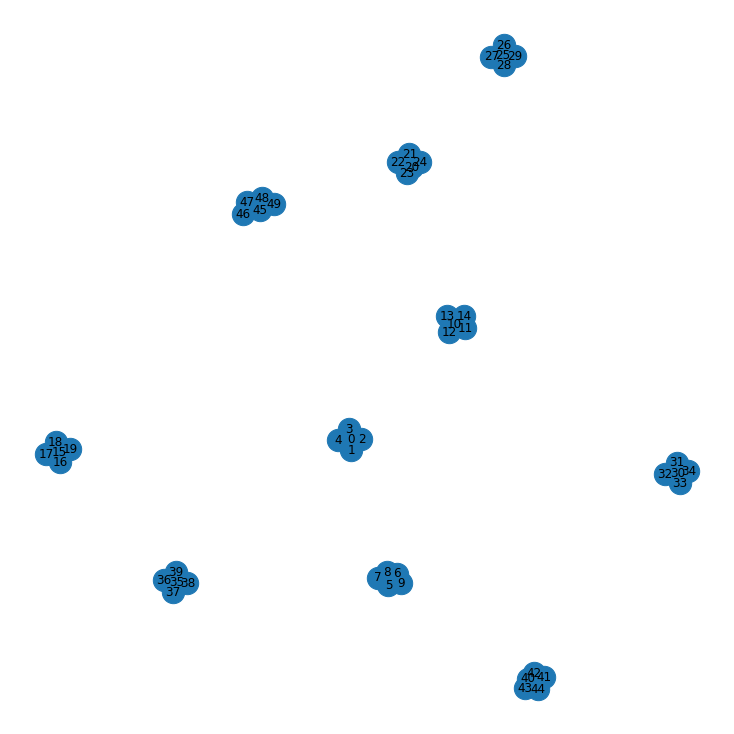

In [9]:
def show_graph_with_labels(gr_matrix):
    rows, cols = np.where(np.array(gr_matrix) > 0.5)
    edges_in = zip(rows.tolist(), cols.tolist())
    rows, cols = np.where((np.array(gr_matrix) > 0.2) & (np.array(gr_matrix) < 0.4))
    edges_ex = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges_in, weight=100)
    gr.add_edges_from(edges_ex, weight=2)
    nx.draw(gr, node_size=500, with_labels=True)

# create communications in clusters
players_graph = internal_communications(players_graph, player_groups)
show_graph_with_labels(players_graph.matrix)

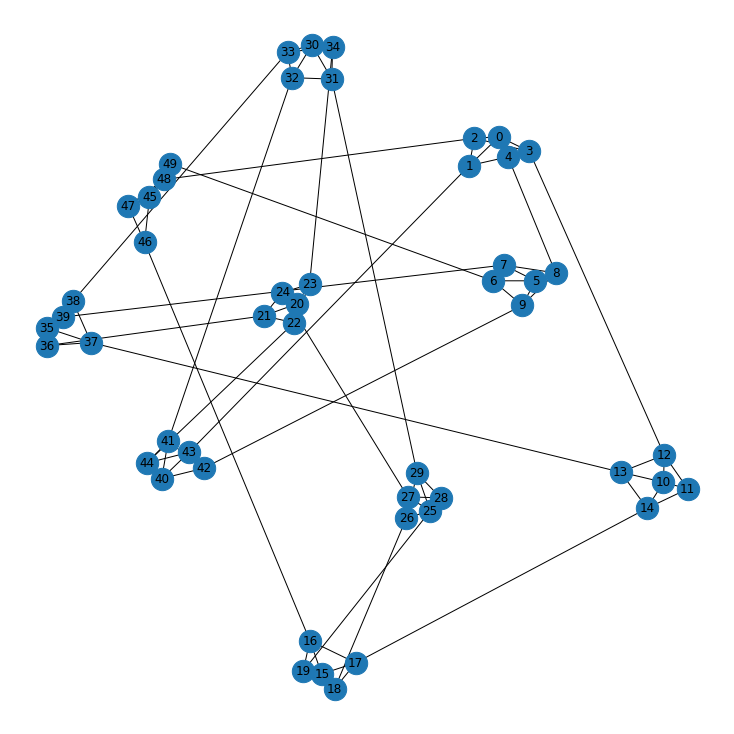

In [10]:
# create communications between clusters
players_graph = external_communications(players_graph, player_groups)
show_graph_with_labels(players_graph.matrix)

In [12]:
def plot_coops_iter(coops):
    plt.plot(coops)
    plt.xlabel('iterations')
    plt.ylabel('num of cooperators') 
    plt.title('Cooperations in the N-Player Prisoner’s Dilemma')

## Simulation

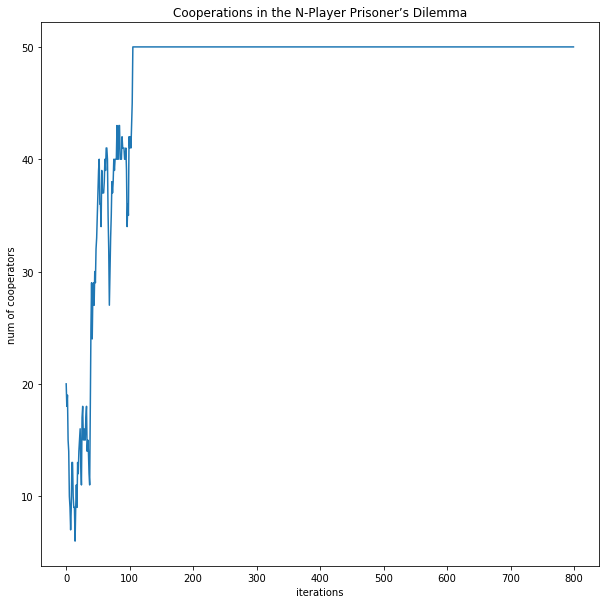

In [13]:
# run 800 itaration of playing prisoners Dilemma, where players updating their strategies
iterations = 800

coops = []
for i in range(iterations):
    players = play_one_round(players, players_graph, n_players)
    players = update_strategies(players, players_graph)
    coops.append(num_coopers(players))

plot_coops_iter(coops)

## Do the same for 300 players 

In [18]:
n_players = 300
# define players and graph
players = create_players(n_players)
players_graph = ListGraph(n_players)
player_groups = make_groups(n_players)
# make links
players_graph = internal_communications(players_graph, player_groups)
players_graph = external_communications(players_graph, player_groups)

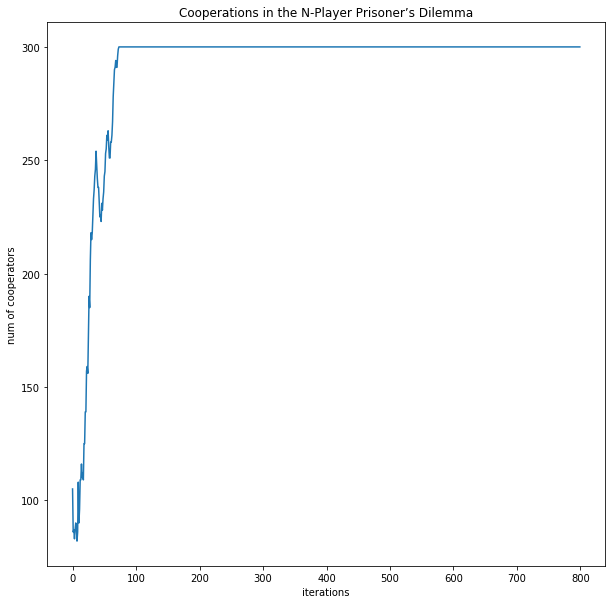

In [16]:
iterations = 800

coops = []
for i in range(iterations):
    players = play_one_round(players, players_graph, n_players)
    players = update_strategies(players, players_graph)
    coops.append(num_coopers(players))

plot_coops_iter(coops)

## Make internal and external links the same

In [31]:
n_players = 300
# define players and graph
players = create_players(n_players)
players_graph = ListGraph(n_players)
player_groups = make_groups(n_players)
# make links
players_graph = internal_communications(players_graph, player_groups, 0.999, 1)
players_graph = external_communications(players_graph, player_groups, 0.999, 1)

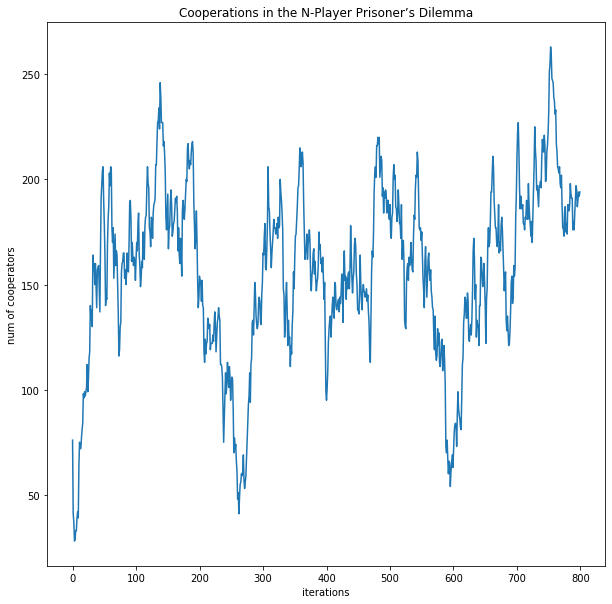

In [32]:
iterations = 800

coops = []
for i in range(iterations):
    players = play_one_round(players, players_graph, n_players)
    players = update_strategies(players, players_graph)
    coops.append(num_coopers(players))

plot_coops_iter(coops)

## Make clusters more isolated. External links very small

In [35]:
n_players = 300
# define players and graph
players = create_players(n_players)
players_graph = ListGraph(n_players)
player_groups = make_groups(n_players)
# make links
players_graph = internal_communications(players_graph, player_groups, 0.999, 1)
players_graph = external_communications(players_graph, player_groups, 0.001, 0.002)

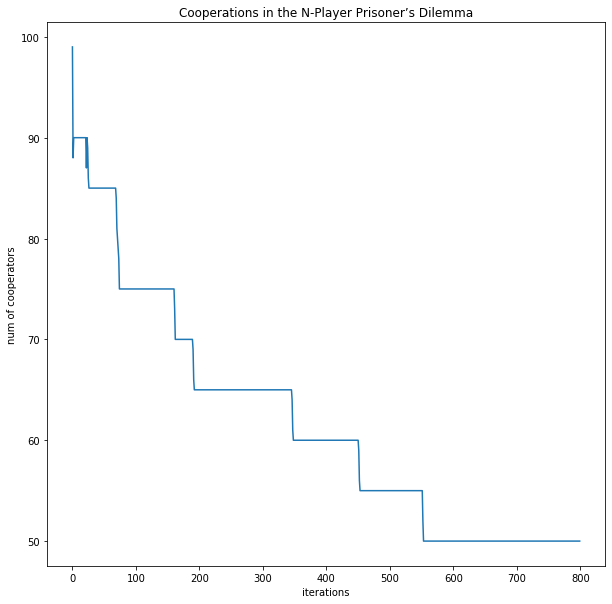

In [36]:
iterations = 800

coops = []
for i in range(iterations):
    players = play_one_round(players, players_graph, n_players)
    players = update_strategies(players, players_graph)
    coops.append(num_coopers(players))

plot_coops_iter(coops)